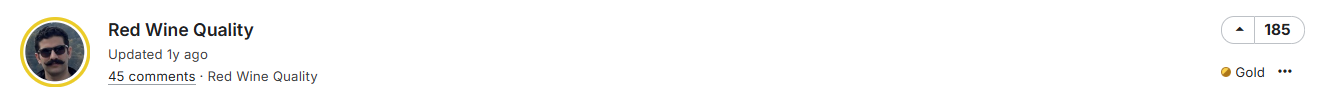

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print(colored('\nAll libraries imported succesfully.', 'green'))


All libraries imported succesfully.


In [3]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [4]:
sns.color_palette("cool_r", n_colors=1)

[(0.4980392156862745, 0.5019607843137255, 1.0)]

In [5]:
sns.set_palette("cool_r")
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


In [6]:
# Import data by using pandas liblary and using read_csv method
data = pd.read_csv('../winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Rename columns to better recall them.
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

In [11]:
# Create a list of DataFrame columns
columns = list(data.columns)

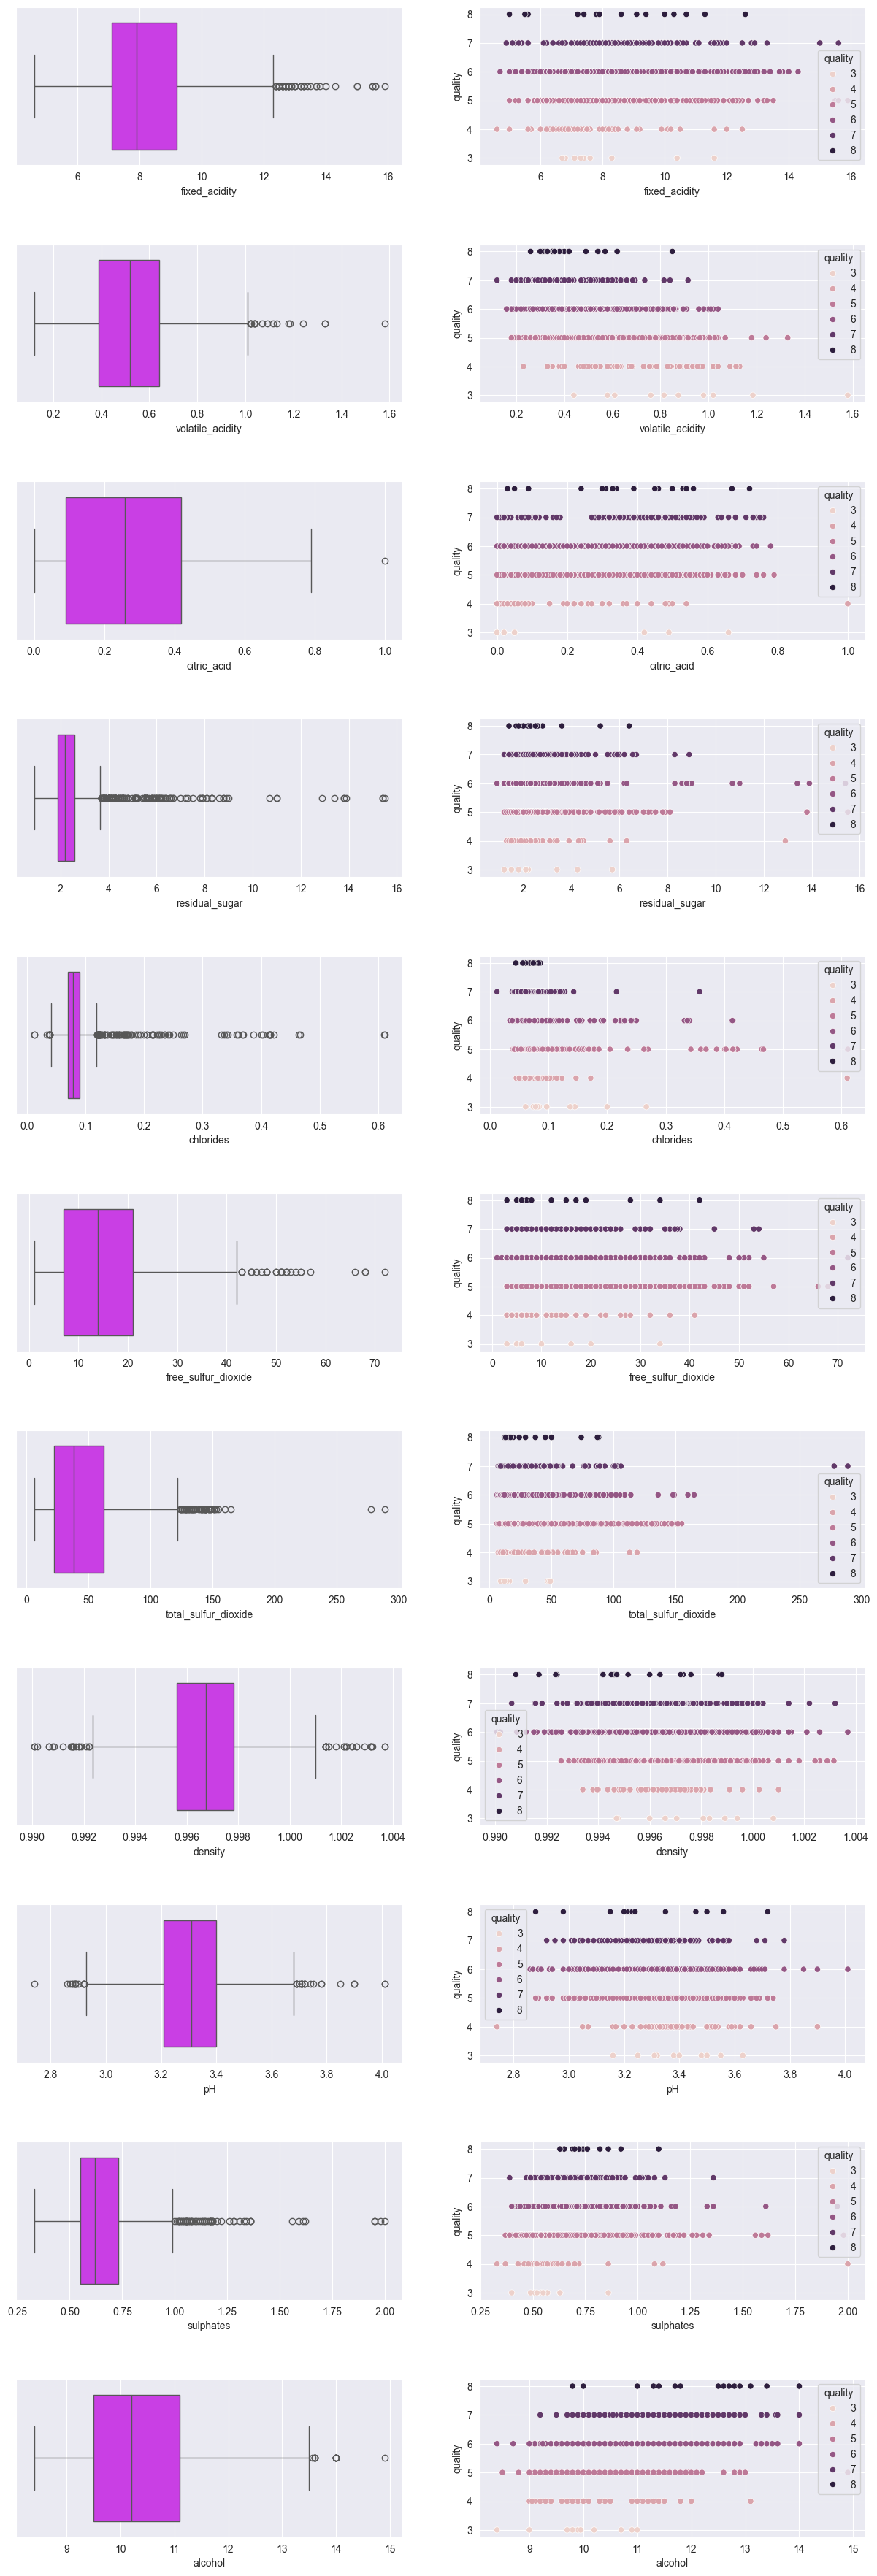

In [12]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=data, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

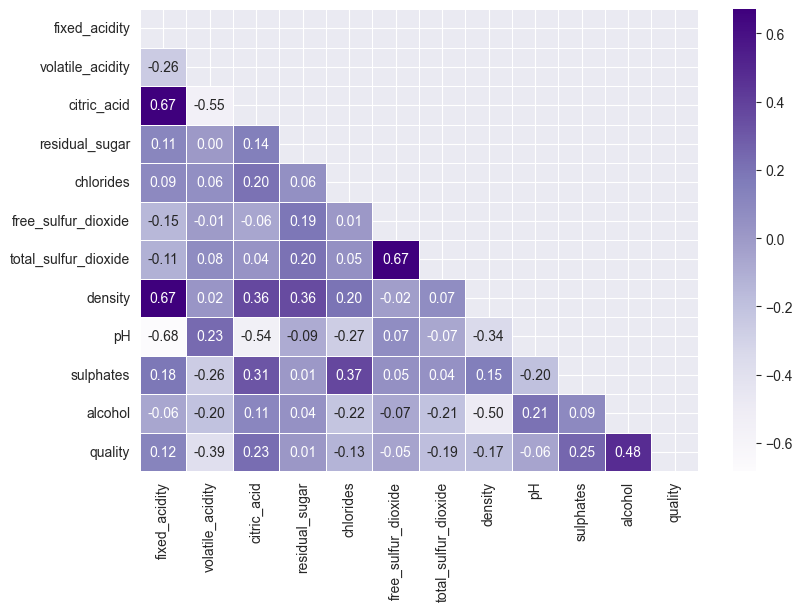

In [13]:
corr = data.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

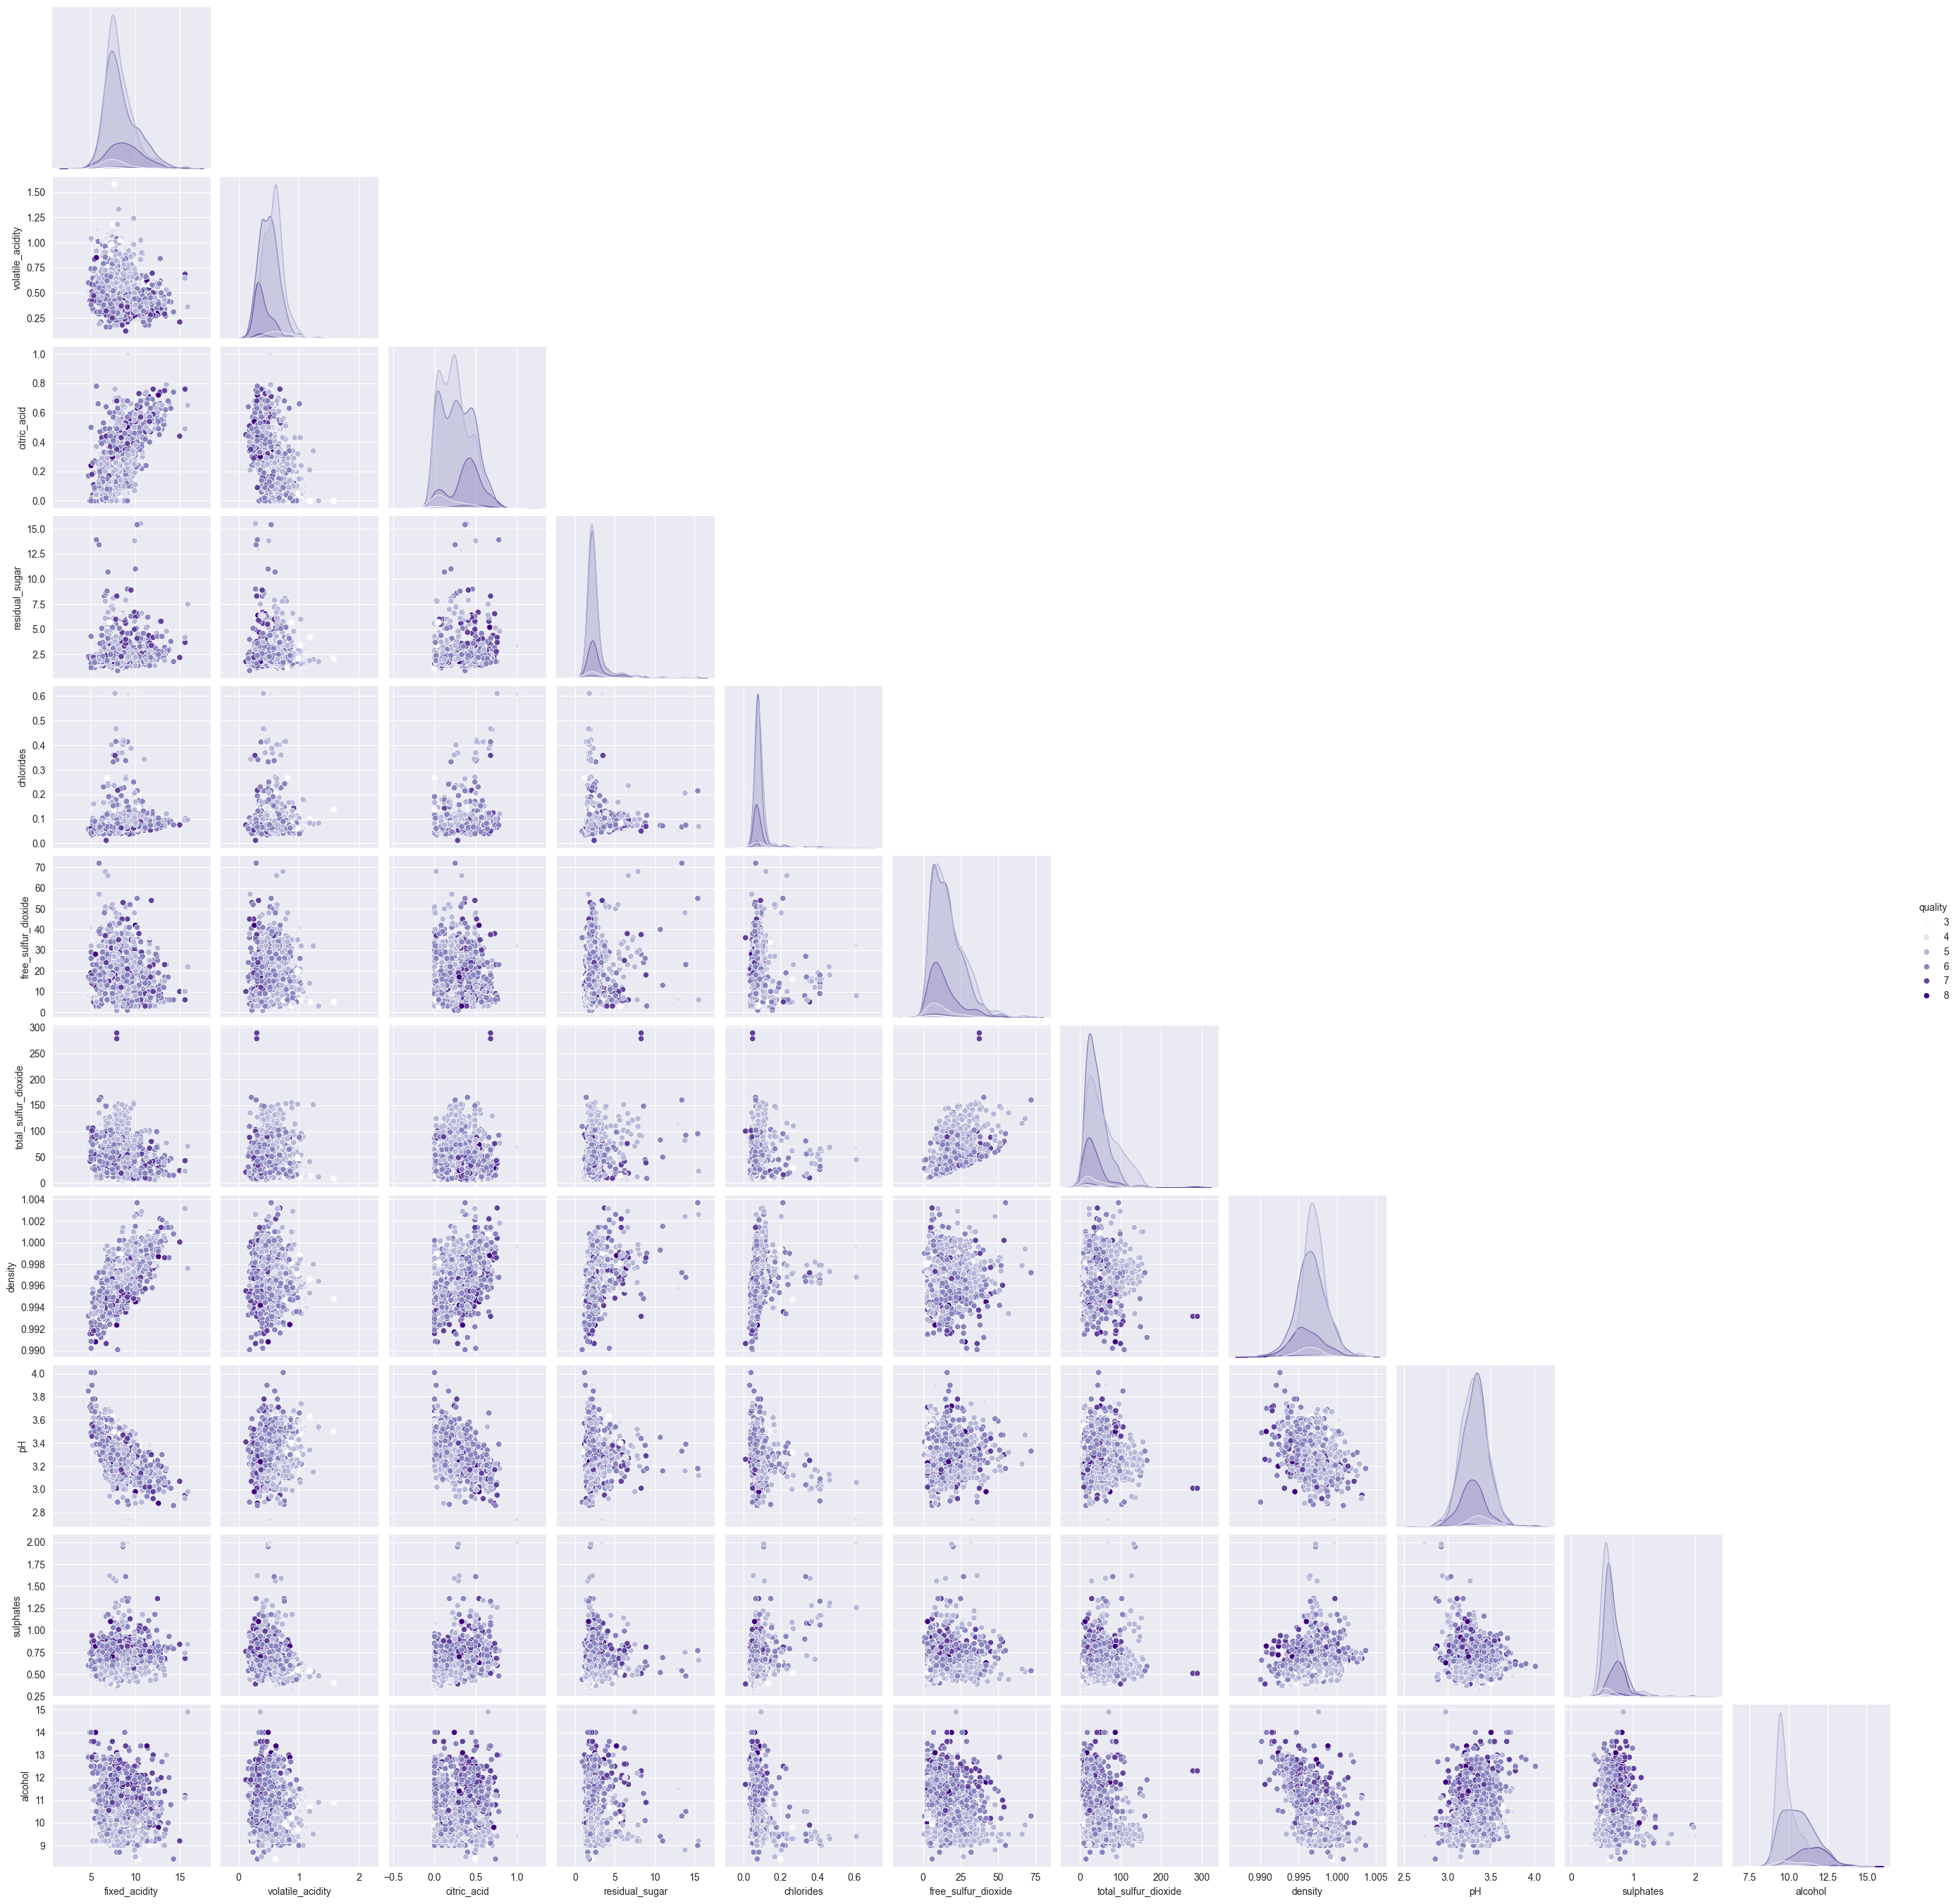

In [14]:
sns.pairplot(data, hue='quality', corner = True, palette='Purples')

In [15]:
# Quality classes :
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [16]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [17]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


In [18]:
# Create X from DataFrame and y as Target
X_temp = data.drop(columns='quality')
y = data.quality

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000000,0.329171,0.154079,0.000000,0.221239,0.292035,0.407080,1.000000
volatile_acidity,1599.000000,0.279329,0.122644,0.000000,0.184932,0.273973,0.356164,1.000000
citric_acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual_sugar,1599.000000,0.112247,0.096570,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1599.000000,0.125988,0.078573,0.000000,0.096828,0.111853,0.130217,1.000000
free_sulfur_dioxide,1599.000000,0.209506,0.147326,0.000000,0.084507,0.183099,0.281690,1.000000
total_sulfur_dioxide,1599.000000,0.142996,0.116238,0.000000,0.056537,0.113074,0.197880,1.000000
density,1599.000000,0.490211,0.138571,0.000000,0.406021,0.490455,0.570117,1.000000
pH,1599.000000,0.449695,0.121564,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1599.000000,0.196496,0.101501,0.000000,0.131737,0.173653,0.239521,1.000000


In [20]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle']) 
    plt.show()

In [21]:
# define a function to ploting Classification report
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [22]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Left AX : Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    
    # Right AX : Classification Report
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [23]:
data.quality.value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [24]:
# Splite Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
accuracy :  0.8699011299435029


In [26]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [27]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.875


In [28]:
y_test.value_counts()

quality
Middle    339
Good       45
Bad        16
Name: count, dtype: int64

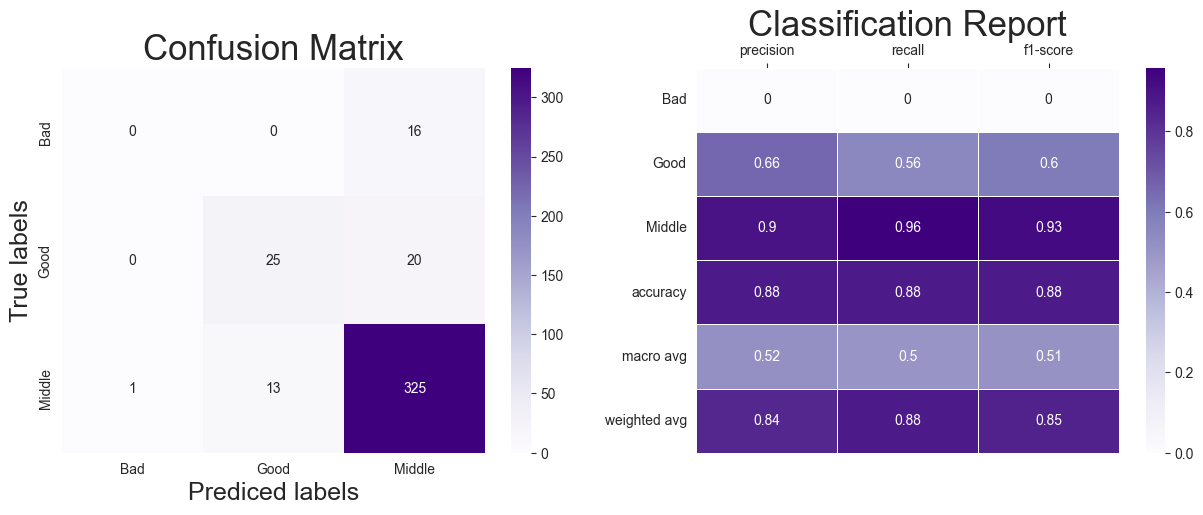

In [29]:
clf_plot(y_pred_rf)

In [30]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
accuracy :  0.82484593837535


In [31]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [32]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.85


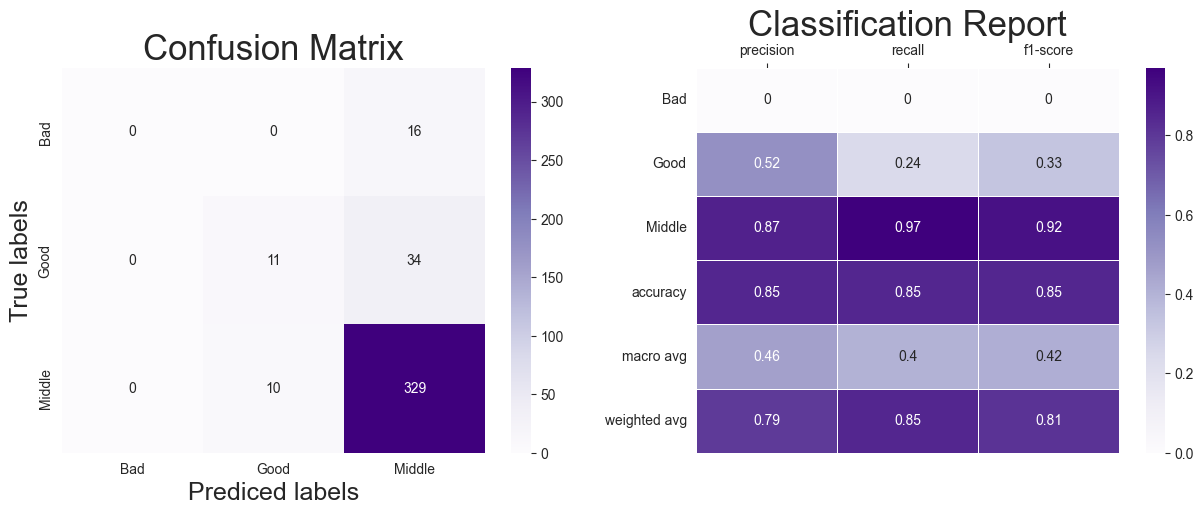

In [33]:
clf_plot(y_pred_lr)

In [34]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 100}
accuracy :  0.8532212885154061


In [35]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [36]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.887


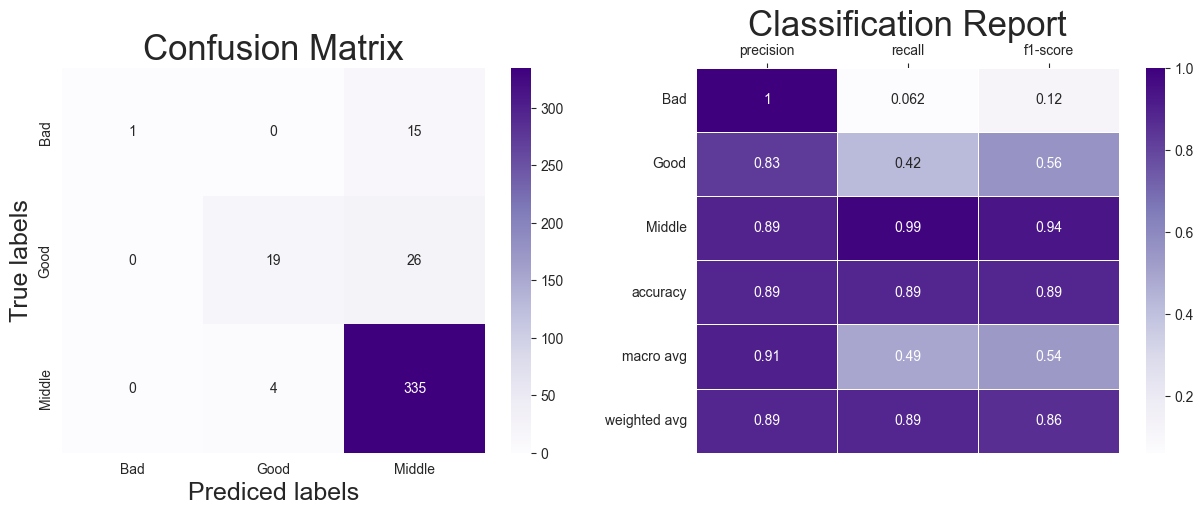

In [37]:
clf_plot(y_pred_svc)

In [38]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': np.int64(7), 'splitter': 'best'}
accuracy :  0.8348879551820728


In [39]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [40]:
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.818


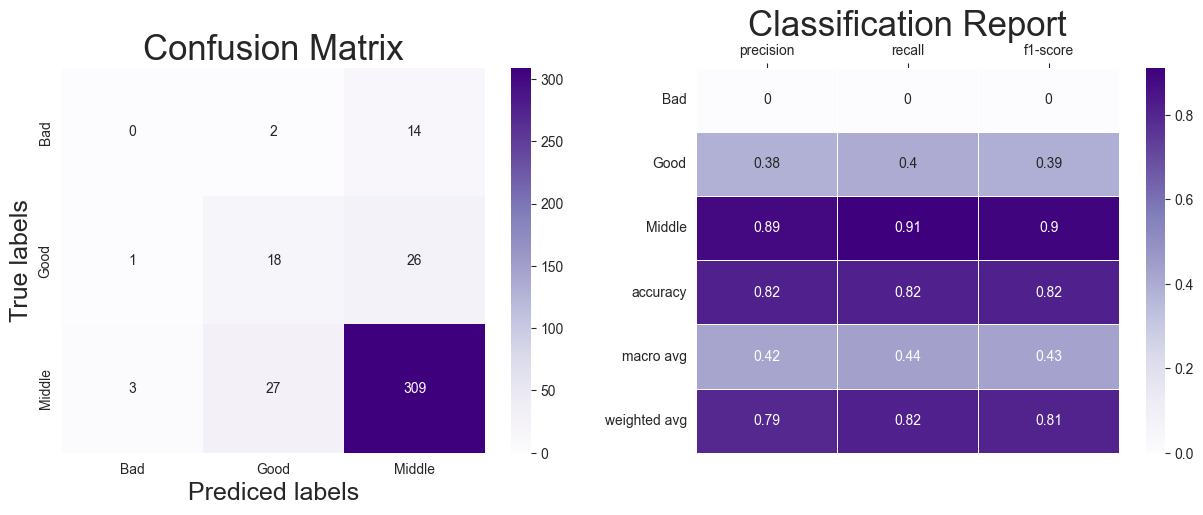

In [41]:
clf_plot(y_pred_tree)

In [42]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': np.int64(11), 'p': 1, 'weights': 'distance'}
accuracy :  0.8615616246498599


In [43]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [44]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.855


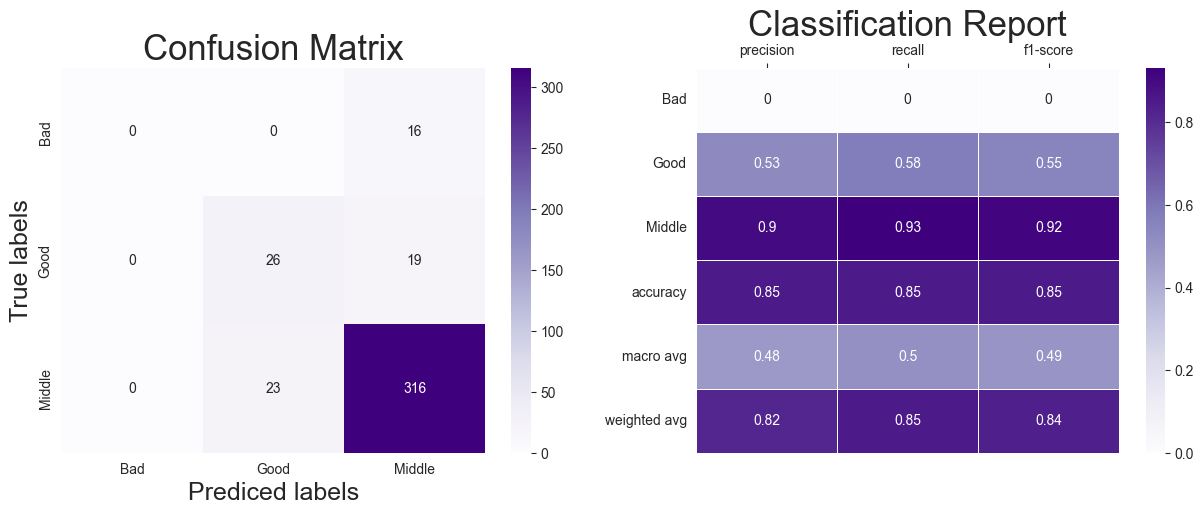

In [45]:
clf_plot(y_pred_knn)

In [46]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.762


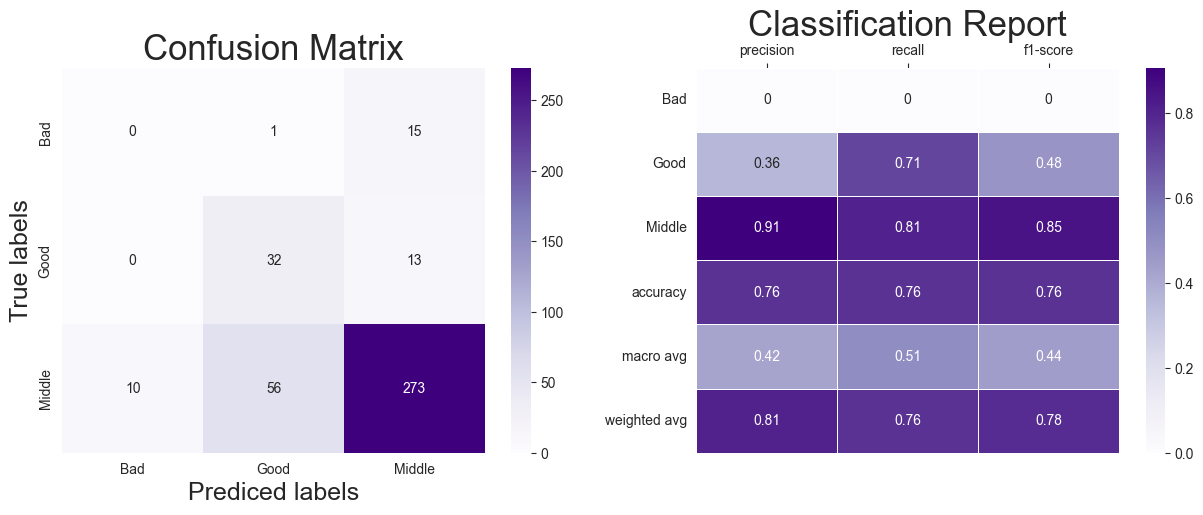

In [47]:
clf_plot(y_pred_gnb)

In [48]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [51]:
sns.set_palette("Purples")

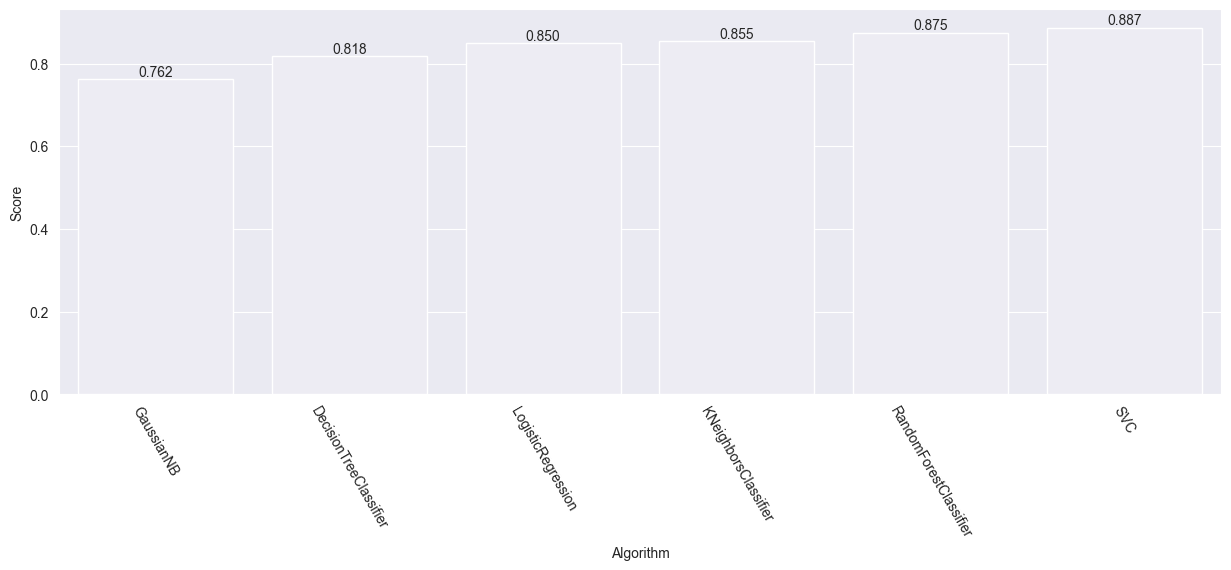

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

In [53]:
# Model
svc = SVC(**svc_cv.best_params_)

In [54]:
svc.fit(X, y)

SVC(C=10, gamma=100)